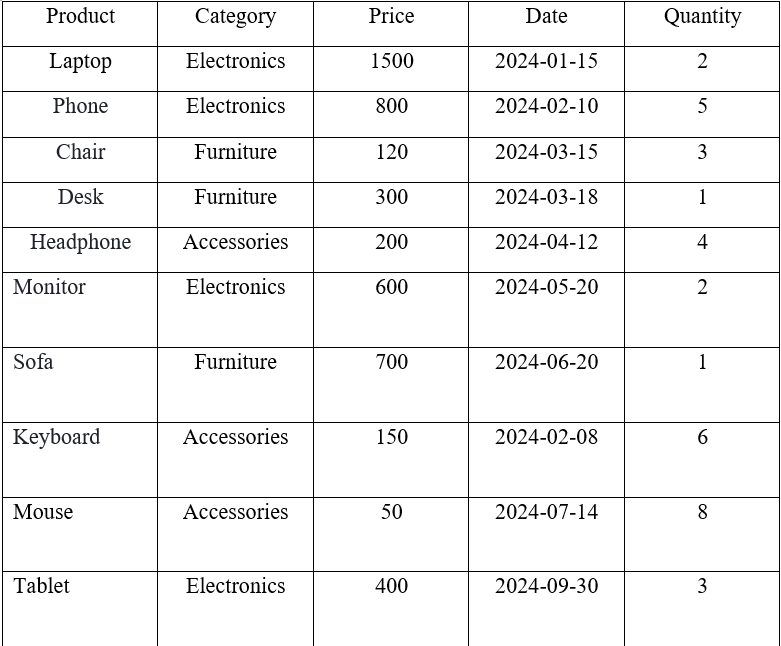

1. Tạo Dataframe như dữ liệu đã cho trên.
2. Hiển thị thông tin Dataframe vừa tạo.
3. Tính giá trị trung bình của cột <Category>.
4. Nhóm dữ liệu cột <Category> và tình tổng trung bình cột <Quantity>.
5. Sấp xếp Dataframe theo cột <Price> giảm dần.
6. Vẽ biểu đồ cột cho <Price>.
7. Vẽ biểu đồ phân tán cho <Quantity> và <Price>.
8. Vẽ biểu đồ đường cho cột <Date>.
9. Vẽ biểu đồ cột thể hiện tổng doanh thu của từng <Category>.
10. Kiểm tra có giá trị NaN nào trong DataFrame không.
11. Tìm các giá trị trùng lặp trong DataFrame dựa trên cột 'Product' và loại bỏ các hàng trùng lặp, giữ lại hàng đầu tiên.
12. Lọc ra các đơn hàng có số lượng (Quantity) lớn hơn 5
13. Tổng doanh thu được tính theo công thức sau:

Revenue = Quantity × Price

Tạo một cột mới trong Dataframe với tên <Revenue> gồm tổng doanh thu của các sản phẩm.
14. Thêm một cột <Sales_Level> với điều kiện:
+ < 500  ->>  Low
+ 500 --- 2000  ->> Medium
+ >2000   ->> High 

15. Vẽ biểu đồ cột thể hiện số lượng đơn hàng ở từng mức <Sales_Level>.
16. Tạo một cột mới <Discount> với giá trị giảm giá 10% nếu doanh thu (Revenue) > 1000, ngược lại giảm giá 5%.
17. Tính doanh thu sau giảm giá <Final_Revenue> bằng công thức:

Final_Revenue = Revenue - ( Revenue ×Discount ).

Tạo một cột mới trong Dataframe với tên <Final_Revenue> gồm doanh thu sau giảm giá.

18. Tạo cột <Month> lấy giá trị tháng từ cột <Date>.
19. Vẽ biểu đồ đường thể hiện tổng doanh thu theo tháng.
20. Lưu DataFrame với tên <BKT_MSSV_Hoten.csv-->

In [32]:
# 1

import pandas as pd
data = {
    "Product": ["Laptop", "Phone", "Chair", "Desk", "Headphone", "Monitor", "Sofa", "Keyboard", "Mouse", "Tablet"],
    "Category": ["Electronics", "Electronics", "Furniture", "Furniture", "Accessories", "Electronics", "Furniture", "Accessories", "Accessories", "Electronics"],
    "Price": [1500, 800, 120, 300, 200, 600, 700, 150, 50, 400],
    "Date": ["2024-01-15", "2024-02-10", "2024-03-15", "2024-03-18", "2024-04-12", "2024-05-20", "2024-06-20", "2024-02-08", "2024-07-14", "2024-09-30"],
    "Quantity": [2, 5, 3, 1, 4, 2, 1, 6, 8, 3]
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

In [33]:
# 2

print(df)

     Product     Category  Price       Date  Quantity
0     Laptop  Electronics   1500 2024-01-15         2
1      Phone  Electronics    800 2024-02-10         5
2      Chair    Furniture    120 2024-03-15         3
3       Desk    Furniture    300 2024-03-18         1
4  Headphone  Accessories    200 2024-04-12         4
5    Monitor  Electronics    600 2024-05-20         2
6       Sofa    Furniture    700 2024-06-20         1
7   Keyboard  Accessories    150 2024-02-08         6
8      Mouse  Accessories     50 2024-07-14         8
9     Tablet  Electronics    400 2024-09-30         3


In [34]:
# 3 

mean_price = df['Price'].mean()
print("Mean Price:", mean_price)

Mean Price: 482.0


In [35]:
# 4

grouped_category = df.groupby('Category')['Quantity'].mean()
print(grouped_category)

Category
Accessories    6.000000
Electronics    3.000000
Furniture      1.666667
Name: Quantity, dtype: float64


In [36]:
# 5. Sấp xếp Dataframe theo cột <Price> giảm dần

sorted_df = df.sort_values(by='Price', ascending=False)
print(sorted_df)

     Product     Category  Price       Date  Quantity
0     Laptop  Electronics   1500 2024-01-15         2
1      Phone  Electronics    800 2024-02-10         5
6       Sofa    Furniture    700 2024-06-20         1
5    Monitor  Electronics    600 2024-05-20         2
9     Tablet  Electronics    400 2024-09-30         3
3       Desk    Furniture    300 2024-03-18         1
4  Headphone  Accessories    200 2024-04-12         4
7   Keyboard  Accessories    150 2024-02-08         6
2      Chair    Furniture    120 2024-03-15         3
8      Mouse  Accessories     50 2024-07-14         8


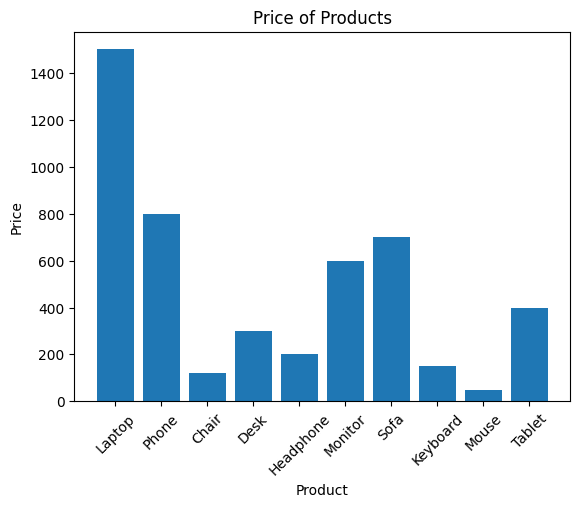

In [ ]:
# 6. Vẽ biểu đồ cột cho <Price>.

import matplotlib.pyplot as plt

plt.bar(df['Product'], df['Price'])
plt.xlabel('Product')   
plt.ylabel('Price')
plt.title('Price of Products')
plt.xticks(rotation=45)
plt.show()

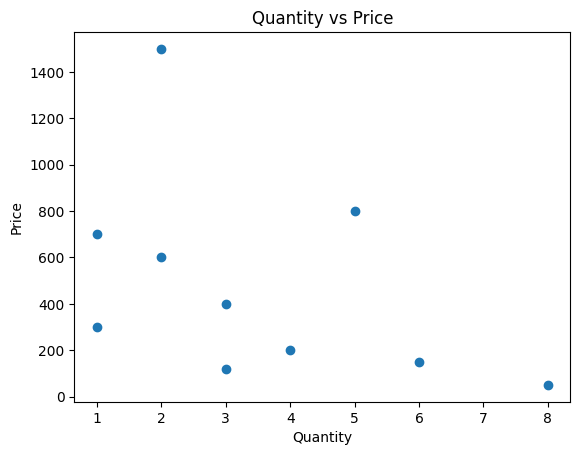

In [19]:
# 7. Vẽ biểu đồ phân tán cho <Quantity> và <Price>.

plt.scatter(df['Quantity'], df['Price'])
plt.title("Quantity vs Price")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.show()

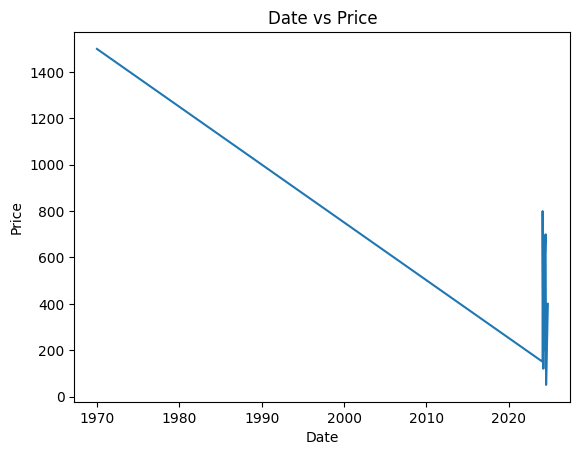

In [ ]:
# 8. Vẽ biểu đồ đường cho cột <Date>.



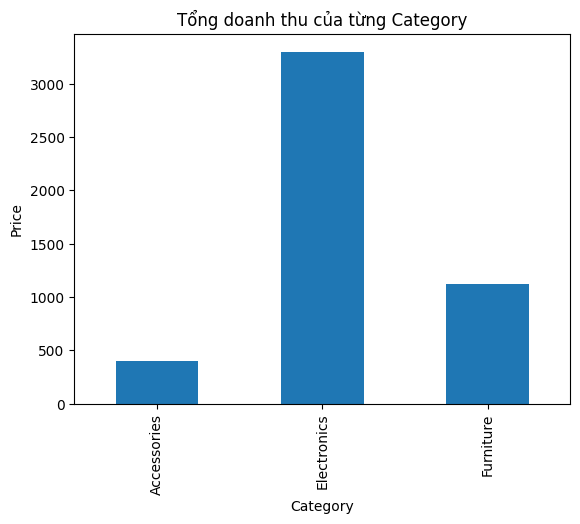

In [24]:
# 9. Vẽ biểu đồ cột thể hiện tổng doanh thu của từng <Category>.

grouped_category = df.groupby('Category')['Price'].sum()
grouped_category.plot(kind='bar')
plt.title("Tổng doanh thu của từng Category")
plt.xlabel("Category")
plt.ylabel("Price")
plt.show()

In [26]:
# 10. Kiểm tra có giá trị NaN nào trong DataFrame không.

print(df.isnull().sum())

Product     0
Category    0
Price       0
Date        0
Quantity    0
dtype: int64


In [40]:
# 11. Tìm các giá trị trùng lặp trong DataFrame dựa trên cột 'Product' và loại bỏ các hàng trùng lặp, giữ lại hàng đầu tiên.

df.drop_duplicates(subset='Product', keep='first', inplace=True)
print(df)

     Product     Category  Price       Date  Quantity
0     Laptop  Electronics   1500 2024-01-15         2
1      Phone  Electronics    800 2024-02-10         5
2      Chair    Furniture    120 2024-03-15         3
3       Desk    Furniture    300 2024-03-18         1
4  Headphone  Accessories    200 2024-04-12         4
5    Monitor  Electronics    600 2024-05-20         2
6       Sofa    Furniture    700 2024-06-20         1
7   Keyboard  Accessories    150 2024-02-08         6
8      Mouse  Accessories     50 2024-07-14         8
9     Tablet  Electronics    400 2024-09-30         3


In [42]:
# 12. Lọc ra các đơn hàng có số lượng (Quantity) lớn hơn 5

filtered_df = df[df['Quantity'] > 5]
print(filtered_df)

    Product     Category  Price       Date  Quantity
7  Keyboard  Accessories    150 2024-02-08         6
8     Mouse  Accessories     50 2024-07-14         8


In [43]:
# 13. Tổng doanh thu được tính theo công thức sau:
# Revenue = Quantity × Price
# Tạo một cột mới trong Dataframe với tên <Revenue> gồm tổng doanh thu của các sản phẩm.

df['Revenue'] = df['Quantity'] * df['Price']
print(df)

     Product     Category  Price       Date  Quantity  Revenue
0     Laptop  Electronics   1500 2024-01-15         2     3000
1      Phone  Electronics    800 2024-02-10         5     4000
2      Chair    Furniture    120 2024-03-15         3      360
3       Desk    Furniture    300 2024-03-18         1      300
4  Headphone  Accessories    200 2024-04-12         4      800
5    Monitor  Electronics    600 2024-05-20         2     1200
6       Sofa    Furniture    700 2024-06-20         1      700
7   Keyboard  Accessories    150 2024-02-08         6      900
8      Mouse  Accessories     50 2024-07-14         8      400
9     Tablet  Electronics    400 2024-09-30         3     1200


In [45]:
# 14. Thêm một cột <Sales_Level> với điều kiện:
# + < 500  ->>  Low
# + 500 --- 2000  ->> Medium
# + >2000   ->> High 

def sales_level(revenue):
    if revenue < 500:
        return 'Low'
    elif revenue >= 500 and revenue <= 2000:
        return 'Medium'
    else:
        return 'High'
    
df['Sales_Level'] = df['Revenue'].apply(sales_level)
print(df)

     Product     Category  Price       Date  Quantity  Revenue Sales_Level
0     Laptop  Electronics   1500 2024-01-15         2     3000        High
1      Phone  Electronics    800 2024-02-10         5     4000        High
2      Chair    Furniture    120 2024-03-15         3      360         Low
3       Desk    Furniture    300 2024-03-18         1      300         Low
4  Headphone  Accessories    200 2024-04-12         4      800      Medium
5    Monitor  Electronics    600 2024-05-20         2     1200      Medium
6       Sofa    Furniture    700 2024-06-20         1      700      Medium
7   Keyboard  Accessories    150 2024-02-08         6      900      Medium
8      Mouse  Accessories     50 2024-07-14         8      400         Low
9     Tablet  Electronics    400 2024-09-30         3     1200      Medium


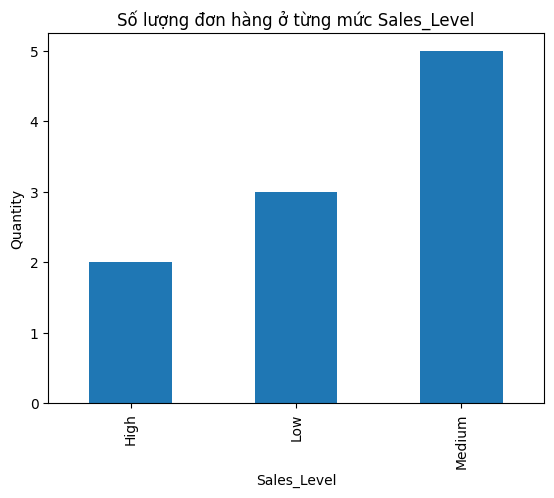

In [47]:
# 15. Vẽ biểu đồ cột thể hiện số lượng đơn hàng ở từng mức <Sales_Level>.

grouped_sales_level = df.groupby('Sales_Level').size()
grouped_sales_level.plot(kind='bar')    
plt.title("Số lượng đơn hàng ở từng mức Sales_Level")
plt.xlabel("Sales_Level")
plt.ylabel("Quantity")
plt.show()

In [49]:
# 16. Tạo một cột mới <Discount> với giá trị giảm giá 10% nếu doanh thu (Revenue) > 1000, ngược lại giảm giá 5%.

def discount(revenue):
    if revenue > 1000:
        return revenue * 0.1
    else:
        return revenue * 0.05
    
df['Discount'] = df['Revenue'].apply(discount)
print(df)

     Product     Category  Price       Date  Quantity  Revenue Sales_Level  \
0     Laptop  Electronics   1500 2024-01-15         2     3000        High   
1      Phone  Electronics    800 2024-02-10         5     4000        High   
2      Chair    Furniture    120 2024-03-15         3      360         Low   
3       Desk    Furniture    300 2024-03-18         1      300         Low   
4  Headphone  Accessories    200 2024-04-12         4      800      Medium   
5    Monitor  Electronics    600 2024-05-20         2     1200      Medium   
6       Sofa    Furniture    700 2024-06-20         1      700      Medium   
7   Keyboard  Accessories    150 2024-02-08         6      900      Medium   
8      Mouse  Accessories     50 2024-07-14         8      400         Low   
9     Tablet  Electronics    400 2024-09-30         3     1200      Medium   

   Discount  
0     300.0  
1     400.0  
2      18.0  
3      15.0  
4      40.0  
5     120.0  
6      35.0  
7      45.0  
8      20.0  
9

In [51]:
# 17. Tính doanh thu sau giảm giá <Final_Revenue> bằng công thức:
# Final_Revenue = Revenue - ( Revenue × Discount ).
# Tạo một cột mới trong Dataframe với tên <Final_Revenue> gồm doanh thu sau giảm giá.

df['Final_Revenue'] = df['Revenue'] - df['Discount']
print(df)

     Product     Category  Price       Date  Quantity  Revenue Sales_Level  \
0     Laptop  Electronics   1500 2024-01-15         2     3000        High   
1      Phone  Electronics    800 2024-02-10         5     4000        High   
2      Chair    Furniture    120 2024-03-15         3      360         Low   
3       Desk    Furniture    300 2024-03-18         1      300         Low   
4  Headphone  Accessories    200 2024-04-12         4      800      Medium   
5    Monitor  Electronics    600 2024-05-20         2     1200      Medium   
6       Sofa    Furniture    700 2024-06-20         1      700      Medium   
7   Keyboard  Accessories    150 2024-02-08         6      900      Medium   
8      Mouse  Accessories     50 2024-07-14         8      400         Low   
9     Tablet  Electronics    400 2024-09-30         3     1200      Medium   

   Discount  Final_Revenue  
0     300.0         2700.0  
1     400.0         3600.0  
2      18.0          342.0  
3      15.0          285.

In [53]:
# 18. Tạo cột <Month> lấy giá trị tháng từ cột <Date>.

df['Month'] = df['Date'].dt.month
print(df)

     Product     Category  Price       Date  Quantity  Revenue Sales_Level  \
0     Laptop  Electronics   1500 2024-01-15         2     3000        High   
1      Phone  Electronics    800 2024-02-10         5     4000        High   
2      Chair    Furniture    120 2024-03-15         3      360         Low   
3       Desk    Furniture    300 2024-03-18         1      300         Low   
4  Headphone  Accessories    200 2024-04-12         4      800      Medium   
5    Monitor  Electronics    600 2024-05-20         2     1200      Medium   
6       Sofa    Furniture    700 2024-06-20         1      700      Medium   
7   Keyboard  Accessories    150 2024-02-08         6      900      Medium   
8      Mouse  Accessories     50 2024-07-14         8      400         Low   
9     Tablet  Electronics    400 2024-09-30         3     1200      Medium   

   Discount  Final_Revenue  Month  
0     300.0         2700.0      1  
1     400.0         3600.0      2  
2      18.0          342.0      3

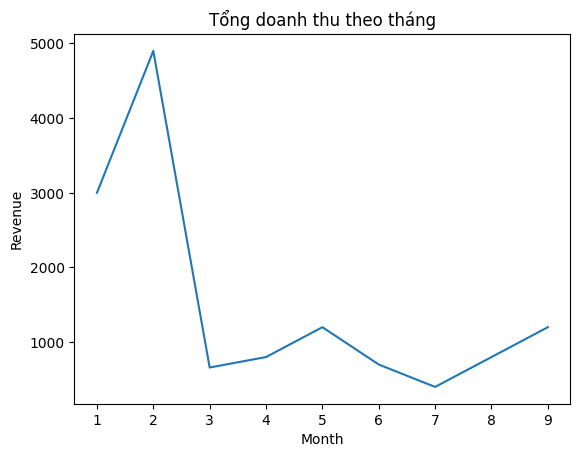

In [55]:
# 19. Vẽ biểu đồ đường thể hiện tổng doanh thu theo tháng.

grouped_month = df.groupby('Month')['Revenue'].sum()
grouped_month.plot(kind='line')
plt.title("Tổng doanh thu theo tháng")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

In [56]:
# 20. Lưu DataFrame với tên <BKT_MSSV_Hoten.csv-->

df.to_csv('BKT_2274802010850_TranNhatThinh.csv', index=False)
print("Saved to BKT_2274802010850_TranNhatThinh.csv")

Saved to BKT_2274802010850_TranNhatThinh.csv
